Analysis of Montgomery TB Chest Xray dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
montogomery_metadata = pd.read_csv('//Users/achu/Documents/Projects/Data-Science/Medical Report Generation/remote-dataset/tuberculosis-chest-xrays-montgomery/montgomery_metadata.csv')
montogomery_metadata.head()

,study_id,age,gender,findings
0,MCUCXR_0001_0.png,27,Female,normal
1,MCUCXR_0002_0.png,40,Female,normal
2,MCUCXR_0003_0.png,21,Female,normal
3,MCUCXR_0004_0.png,11,Female,normal
4,MCUCXR_0005_0.png,33,Male,normal


In [3]:
print(montogomery_metadata.info())
labels = montogomery_metadata['findings'].unique()
print(labels)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   study_id  138 non-null    object
 1   age       138 non-null    int64 
 2   gender    138 non-null    object
 3   findings  138 non-null    object
dtypes: int64(1), object(3)
memory usage: 4.4+ KB
None
['normal'
 'inactive TB scars LUL, unchanged for 2Y, pt previously treated DOT (17Y ago) for pan-sensitive disease'
 'extensive cavitary TB smear and culture positive involving LUL lungula and some areas in rt lung as well; pt had previously normal CXR (1Y ago) but positive TST and contact with active case'
 'bilateral miliary nodules diffusely with RML infiltrate and right pleural effusion; an old calcified granuloma is present behind heart in the LLL; all findings consistent with active TB'
 'stable CXR since 6M; off Rx since 6M (same pt as MCUCXR_0113_1)'
 'large right pleural effusion, positive TST, TB

In [4]:
# Assuming 'montgomery_metadata' is a DataFrame with the 'age' column
ages = montogomery_metadata['age'].value_counts().reset_index()
print(ages)
ages.columns = ['Age', 'Count']

# Create the bar chart using Plotly
fig = px.bar(ages, x='Age', y='Count', 
             title='Age Distribution',
             labels={'Age': 'Age', 'Count': 'Count'},
             hover_data={'Age': True, 'Count': True})

# Show the figure
fig.show()


    age  count
0    44      7
1    32      5
2    33      5
3    47      5
4    49      5
..  ...    ...
56   38      1
57   19      1
58    4      1
59    9      1
60   42      1

[61 rows x 2 columns]


In [5]:
#Plot the age group of the patients that are not normal
not_normal = montogomery_metadata[montogomery_metadata['findings'] != 'normal']
not_normal = not_normal['age'].value_counts().reset_index()
not_normal.columns = ['Age', 'Count']

# Create the bar chart using Plotly
fig = px.bar(not_normal, x='Age', y='Count', 
             title='Not Normal Age Distribution',
             labels={'Age': 'Age', 'Count': 'Count'},
             hover_data={'Age': True, 'Count': True})

# Show the figure
fig.show()


#Plot the age group of the patients that are normal
normal = montogomery_metadata[montogomery_metadata['findings'] == 'normal']
normal = normal['age'].value_counts().reset_index()
normal.columns = ['Age', 'Count']

# Create the bar chart using Plotly
fig = px.bar(normal, x='Age', y='Count', 
             title='Normal Age Distribution',
             labels={'Age': 'Age', 'Count': 'Count'},
             hover_data={'Age': True, 'Count': True})
fig.show()

Image Analysis of Chest Xray

Study ID: MCUCXR_0399_1.png
Image Dimensions: 4020x4892


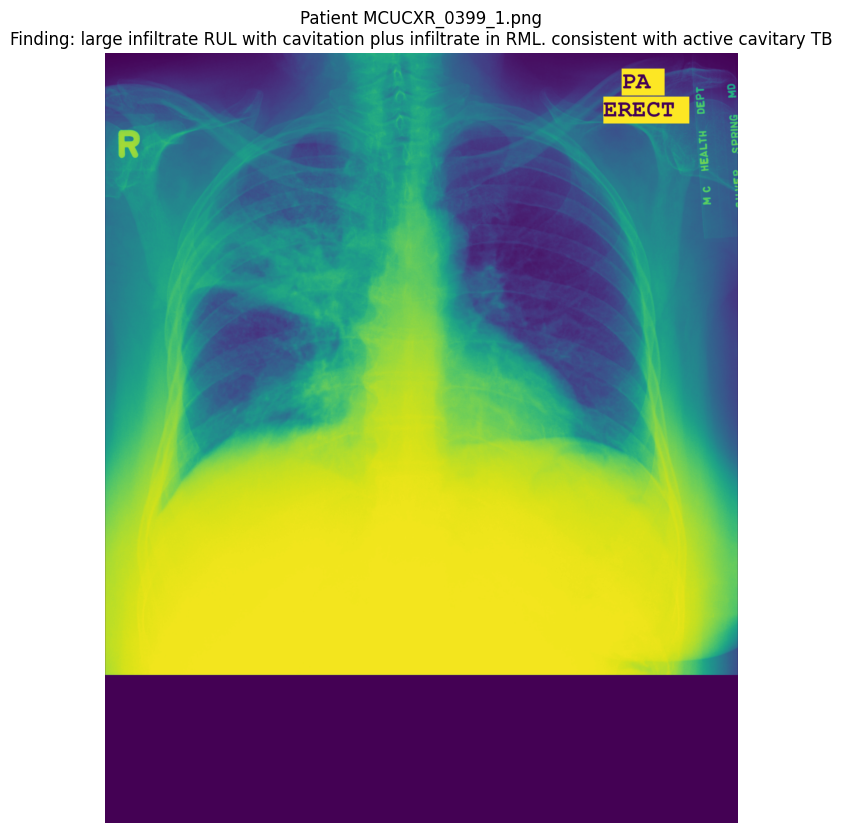

Study ID: MCUCXR_0001_0.png
Image Dimensions: 4020x4892


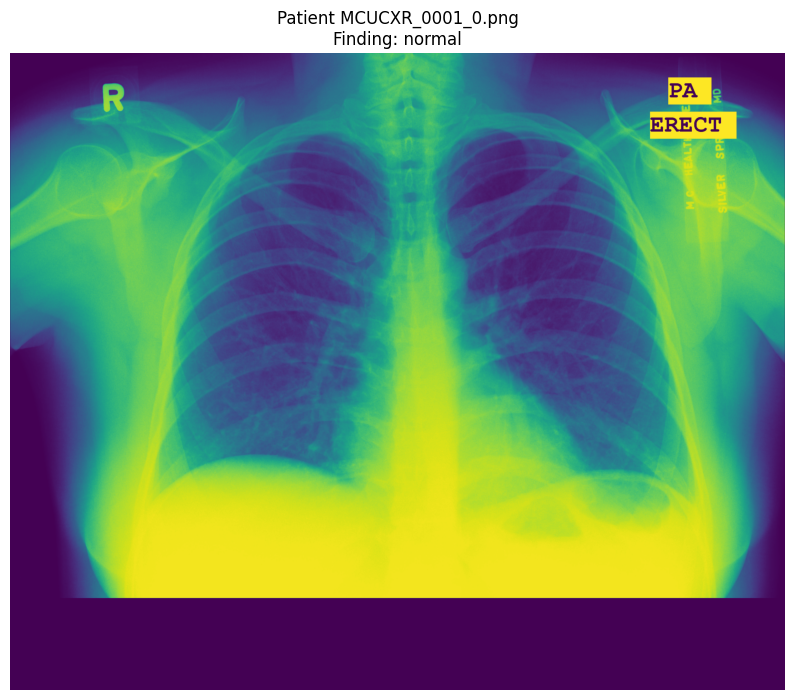

In [6]:
# Find the study_id for the patient with the specific finding
specific_finding = "large infiltrate RUL with cavitation plus infiltrate in RML. consistent with active cavitary TB"
patient_info = montogomery_metadata[montogomery_metadata['findings'] == specific_finding]
study_id = patient_info['study_id'].values[0]
print(f"Study ID: {study_id}")

# Load and display the image
from PIL import Image
import matplotlib.pyplot as plt

image_path = f"/Users/achu/Documents/Projects/Data-Science/Medical Report Generation/remote-dataset/tuberculosis-chest-xrays-montgomery/images/{study_id}"
image = Image.open(image_path)
# Get image dimensions
width, height = image.size
print(f"Image Dimensions: {width}x{height}")

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.title(f"Patient {study_id}\nFinding: {specific_finding}")
plt.axis("off")
plt.show()

# Find the study_id for the patient with  normal chest xray
# Find the study_id for the patient with the specific finding
specific_finding = "normal"
patient_info = montogomery_metadata[montogomery_metadata['findings'] == specific_finding]
study_id = patient_info['study_id'].values[0]
print(f"Study ID: {study_id}")

# Load and display the image
from PIL import Image
import matplotlib.pyplot as plt

# Get image dimensions
width, height = image.size
print(f"Image Dimensions: {width}x{height}")

image_path = f"/Users/achu/Documents/Projects/Data-Science/Medical Report Generation/remote-dataset/tuberculosis-chest-xrays-montgomery/images/{study_id}"
image = Image.open(image_path)

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.title(f"Patient {study_id}\nFinding: {specific_finding}")
plt.axis("off")
plt.show()
